In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('insurance_pre.csv')
df

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [5]:
df=pd.get_dummies(df,dtype=int,drop_first=True)
df

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [6]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [17]:
indep=df[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]
dep=df[['charges']]

In [18]:
indep

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(indep, dep, test_size=0.2, random_state=0)

MULTI_LINEAR_REGRESSION

In [20]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred=reg.predict(x_test)

In [24]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
r_score

0.7978644236809905

SUPPORT_VACTOR_MACHINE

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train) 
x_test=sc.transform(x_test)

In [211]:
from sklearn.svm import SVR
regressor=SVR(kernel="sigmoid",C=200) #rbf --non_linear --poly,sigmoid,linear
regressor.fit(x_train,y_train)

c:\Users\malathi.a\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=200, kernel='sigmoid')

In [212]:
y_pred=regressor.predict(x_test)

In [213]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
r_score 

0.5366255393680149

DECISION_TREE

In [77]:
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor(criterion='friedman_mse',splitter='best')
reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse')

In [63]:
import matplotlib.pyplot as plt

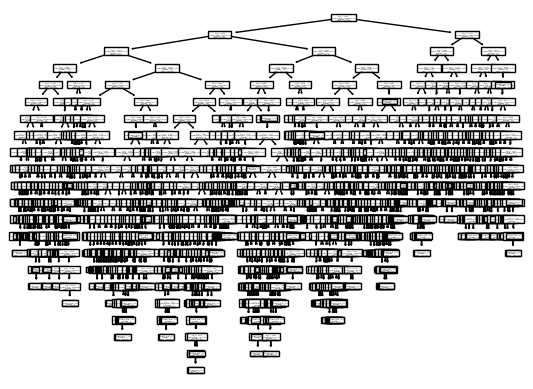

In [71]:
from sklearn import tree
tree.plot_tree(reg)
plt.show()

In [78]:
y_pred=reg.predict(x_test)

In [79]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
r_score

0.7036236173892211

RandomForestRegressor

In [155]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(criterion='friedman_mse',n_estimators=100,max_features='sqrt',random_state=0)
regressor.fit(x_train,y_train)

c:\Users\malathi.a\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(criterion='friedman_mse', max_features='sqrt',
                      random_state=0)

In [156]:
y_pred=regressor.predict(x_test)

In [157]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
r_score

0.8941199935642121

In [158]:
import pickle
filename='Finalized_random_forest.sav'


In [160]:
pickle.dump(regressor,open(filename,'wb'))

In [162]:
loaded_model=pickle.load(open("Finalized_random_forest.sav",'rb'))
result=loaded_model.predict([[28,30.900,0,0,1]]) 
result

array([49573.7565731])